# Discussion 1: Writing Good Notebooks

## Notebook Conventions

### Imports

At the top of the notebook, I usually import the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

More specific imports can just be done later on when you need them.

In [2]:
from scipy.integrate import odeint

### Explaining Yourself

In this problem, we need to add $a$ and $b$

$$
x = a + b
$$

In the cell below, I'm defining a function to compute $x$

In [3]:
def func(a, b):
    return a + b

print(func(3, 4))

7


### Cells as Units

Take a look at the homework solutions on Canvas.

## Python Conventions

### Documenting Functions

In addition to markdown, try to document your functions (numpydoc convention) https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt

In [4]:
def func(a, b, c=0):
    """Multiplies the sum of a and b by c
    
    Parameters
    ----------
    a : float
        The first number
    b : float
        The second number
    c : float, optional, default=0
        The multiplier
        
    Returns
    -------
    x : float
        The sum of a and b multiplied by c
    """
    return c * (a + b)

In [5]:
help(func)

Help on function func in module __main__:

func(a, b, c=0)
    Multiplies the sum of a and b by c
    
    Parameters
    ----------
    a : float
        The first number
    b : float
        The second number
    c : float, optional, default=0
        The multiplier
        
    Returns
    -------
    x : float
        The sum of a and b multiplied by c



### Using Loops to the Fullest

`zip` can be used to iterate over multiple things at once:

In [6]:
initial_conditions = [1, 2, 3]
colors = ['green', 'red', 'blue']
for ic, color in zip(initial_conditions, colors):
    print("ic is {}, color is {}".format(ic, color))

ic is 1, color is green
ic is 2, color is red
ic is 3, color is blue


`enumerate` gives you an indexing variable

In [7]:
x = [4, 2, 5, 7]
for index, element in enumerate(x):
    print("index {}, {}".format(index, element))

index 0, 4
index 1, 2
index 2, 5
index 3, 7


`zip` and `enumerate` can be used together. Note that `enumerate` yields a tuple, so to unpack the contents that are zipped, use parentheses.

In [8]:
x = [4, 2, 5, 7]
colors = ['r', 'g', 'b']
for index, (element, color) in enumerate(zip(x, colors)):
    print("index {}, {} ({})".format(index, element, color))

index 0, 4 (r)
index 1, 2 (g)
index 2, 5 (b)


If you don't unpack the zipped contents, you can still access them later:

In [9]:
x = [4, 2, 5, 7]
colors = ['r', 'g', 'b']
for index, zipped in enumerate(zip(x, colors)):
    # unpacking
    element, color = zipped
    print("index {}, {} ({})".format(index, element, color))
    # indexing
    print("index {}, {} ({})".format(index, zipped[0], zipped[1]))

index 0, 4 (r)
index 0, 4 (r)
index 1, 2 (g)
index 1, 2 (g)
index 2, 5 (b)
index 2, 5 (b)


## Plotting Tips

### Settings in Loops

`zip` can be useful in plotting loops to specify properties of lines

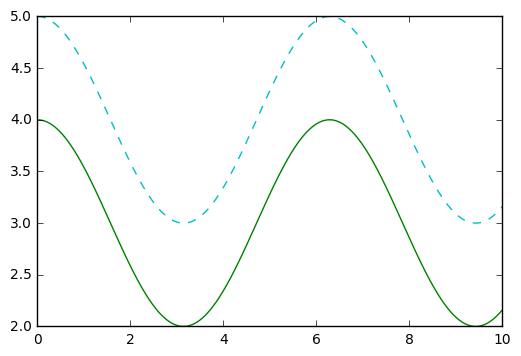

In [10]:
x = np.linspace(0, 10, 1000)
offsets = [3, 4]
linestyles = ['-', '--']
colors = ['g', 'c']
for offset, linestyle, color in zip(offsets, linestyles, colors):
    y = np.cos(x) + offset
    plt.plot(x, y, color=color, linestyle=linestyle)

### Using matplotlib.rc

http://matplotlib.org/examples/color/color_cycle_demo.html

If you're generating multiple plots, you might want to set the order of linestyle, color, linewidth, etc. for *all* plots. By defualt, multiple `plt.plot` calls just change the color.

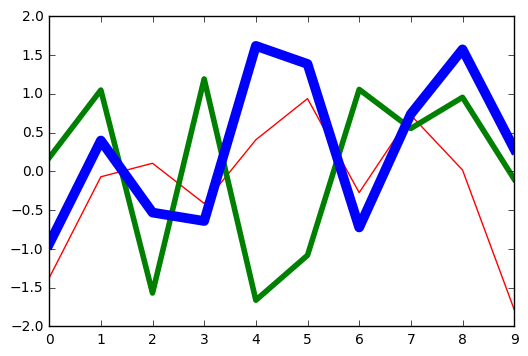

In [11]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linewidth', np.linspace(1, 10, 4))))

for i in range(3):
    plt.plot(np.random.randn(10))

Each figure restarts the cycle.

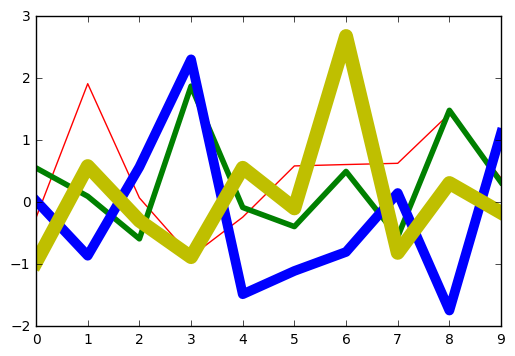

In [12]:
for i in range(4):
    plt.plot(np.random.randn(10))

## Miscellaneous

Related to questions asked during the session

### Equations

One LaTeX environment that can be useful for showing derivations is `aligned`:

$$
\begin{aligned}
x &= a + b \\
  &= (1) + (3)
\end{aligned}
$$

### Iterating over a slice

You can use `enumerate` and such on slices, but note the mismatch between the index given to you and the index of the element.

In [13]:
x = np.arange(10)

for i, element in enumerate(x[-5:]):
    i_of_x = np.where(x == element)[0][0]
    print("i from enumerate: {}, index in x: {}".format(i, i_of_x))

i from enumerate: 0, index in x: 5
i from enumerate: 1, index in x: 6
i from enumerate: 2, index in x: 7
i from enumerate: 3, index in x: 8
i from enumerate: 4, index in x: 9
